This project aims at classifiying the data of MAGIC Gamma telescope into two classes : g(gamma) and h(hardon).

This dataset is taken from UCI Machine Learning Reposetory

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Importing the dataset
data = pd.read_csv('/content/telescope_data.csv')

data.head

y = data['class']
X = data.drop(['class'], axis = 1)

X

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [ ]:
#checking for any missing values and columns
X.isnull().sum()

#as you can see there are no missing values in the dataset

Unnamed: 0    0
fLength       0
fWidth        0
fSize         0
fConc         0
fConc1        0
fAsym         0
fM3Long       0
fM3Trans      0
fAlpha        0
fDist         0
dtype: int64

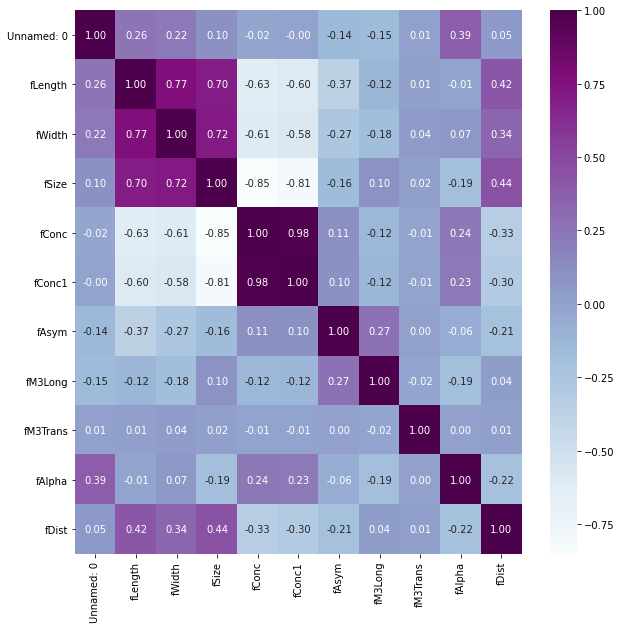

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = X.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(cor,annot=True,fmt='.2f',cmap='BuPu',
            annot_kws={'size':10},cbar=True)

In [ ]:
# spliting the datset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

y_train

9168     g
8383     g
3980     g
8011     g
9018     g
        ..
9225     g
13123    h
9845     g
10799    g
2732     g
Name: class, Length: 14265, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

X_train

,0,1,2,3,4,5,6,7,8,9,10
0,-0.057428,-0.638045,-0.202863,-0.636132,-0.148420,-0.303922,-0.350594,-0.319111,0.714225,1.089107,-0.043958
1,-0.200186,-0.370001,-0.027647,0.582466,-0.939157,-0.957912,0.698945,-0.036995,0.410541,-0.777456,-0.691939
2,-1.000904,0.124203,0.609528,1.574151,-1.096650,-1.076656,0.834599,0.892289,1.256608,-0.880196,-0.789104
3,-0.267837,0.659828,0.018435,0.381165,-0.952781,-0.967807,-1.581290,0.890949,0.734871,-0.887666,0.657143
4,-0.084707,0.091947,-0.255542,0.022804,-0.584388,-0.651157,0.453142,0.966302,0.571279,-0.499551,0.121129
...,...,...,...,...,...,...,...,...,...,...,...
14260,-0.047062,-0.434424,-0.314346,-0.428481,-0.603461,-0.697935,0.444233,0.258305,0.335882,-0.427378,-0.475044
14261,0.661818,-0.295272,-0.331316,-0.019319,-0.382752,-0.435260,0.342280,0.506675,-0.307164,-0.547181,1.220059
14262,0.065689,-0.409436,-0.286709,0.119750,-0.403461,-0.365093,0.726159,0.134377,0.527770,-1.041348,0.552122
14263,0.239181,-0.774778,-0.502751,-0.884635,0.407440,0.238521,0.269237,-0.010774,0.364306,-0.230692,0.247377


# Training and testing this data on different classifiers to ckeck their accuracy

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model1 = Perceptron()
model2 = LogisticRegression()
model3 = SVC()
model4 = KNeighborsClassifier()
model5 = GaussianNB()
model6 = DecisionTreeClassifier()
model7 = RandomForestClassifier()

models = [model1, model2, model3, model4, model5, model6, model7]

for model in models:
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  print("Accuracy: {:.2f}%".format(accuracy_score(y_test, preds)*100))

Accuracy: 98.84%
Accuracy: 99.62%
Accuracy: 99.24%
Accuracy: 97.64%
Accuracy: 89.30%
Accuracy: 99.98%
Accuracy: 99.98%


# Using Random Forest Classifier for the classification task

In [ ]:
def score(i):
  model = RandomForestClassifier(i)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  return accuracy_score(y_test, preds) * 100

In [ ]:
results = {}
for i in range(1,9):
    results[50*i] = score(i * 50)

AttributeError: ignored

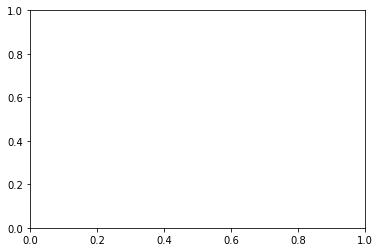

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [ ]:

model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Predicting for test set
preds = model.predict(X_test)
preds = le.fit_transform(preds)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, preds)*100))

Accuracy: 99.98%
